# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pingouin import welch_anova,pairwise_gameshowell, pairwise_ttests
from scipy.stats import chi2,ttest_ind,mannwhitneyu,levene,bartlett,f_oneway,kruskal,shapiro,anderson,normaltest, chisquare
OUTDATED_IGNORE=1

%matplotlib inline

C:\Users\catin\Anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [2]:
claim = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
claim.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
claim.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
claim.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
claim_copy = claim.copy()

In [8]:
claim_copy.replace('-',np.nan,inplace=True)

In [9]:
claimdesccopy=[]
for i in claim_copy.columns:
    claimdesccopy.append([i, 
                      claim_copy[i].dtypes, 
                      claim_copy[i].isna().sum(), 
                      round((((claim_copy[i].isna().sum())/(len(claim_copy)))*100),2), 
                      claim_copy[i].nunique(),
                      claim_copy[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(claimdesccopy, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[0905140M, 0925059M]"
1,Date Received,object,70,0.14,3522,"[16-Dec-09, 14-Sep-05]"
2,Incident Date,object,570,1.12,10788,"[3/23/2010 14:30, 3/9/2010 7:45]"
3,Airport Code,object,2151,4.21,404,"[I, TLH]"
4,Airport Name,object,2151,4.21,418,"[Wiley Post/Will Rogers Memorial, Hickory Regi..."
5,Airline Name,object,9596,18.79,242,"[South African Airways, EL AL Israeli Airlines ]"
6,Claim Type,object,2031,3.98,7,"[Complaint, Motor Vehicle]"
7,Claim Site,object,249,0.49,5,"[Bus Station, Checkpoint]"
8,Item,object,2148,4.21,1853,[Books - Other (Hardcover non-fiction); Clothi...
9,Claim Amount,object,4180,8.19,13247,"[$128.98 , $84.84 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [10]:
claim_copy['Date Received'] = pd.to_datetime(claim_copy['Date Received'], utc=False)

In [11]:
isi = []
for i, j in enumerate(claim_copy['Incident Date'].values):
    if len(str(j)) == 17:
        temp = pd.DataFrame(claim_copy.loc[i].T)
        isi.append(temp)
claim_copy_daydiff= pd.concat(isi,axis=1).T

In [12]:
claim_copy_daydiff

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [13]:
def fix_incidentdate(row):
   if str(row['Incident Date']) != 'nan':
       if (len(str(row['Incident Date'])) >= 17) and (row['Incident Date'][7] == '0'):
           new_date = row['Incident Date'][:7] + str(row['Date Received'].year) + row['Incident Date'][11:]
           return new_date
       else:
           return row
       
   else:
       return row
       
claim_copy['Incident Date'] = claim_copy[['Incident Date', 'Date Received']].apply(fix_incidentdate, axis = 1)

In [14]:
claim_copy['Incident Date'] = pd.to_datetime(claim_copy['Incident Date'], utc=False)

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [15]:
claim_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [16]:
claim_copy['Day Differences'] = (claim_copy['Date Received']-claim_copy['Incident Date']).dt.days

In [17]:
claim_copy.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [18]:
claim_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number       51066 non-null object
Date Received      50996 non-null datetime64[ns]
Incident Date      50496 non-null datetime64[ns]
Airport Code       48915 non-null object
Airport Name       48915 non-null object
Airline Name       41470 non-null object
Claim Type         49035 non-null object
Claim Site         50817 non-null object
Item               48918 non-null object
Claim Amount       46886 non-null object
Status             47877 non-null object
Close Amount       33786 non-null object
Disposition        32846 non-null object
Day Differences    50460 non-null float64
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 5.5+ MB


In [19]:
DayDiff = claim_copy[np.isfinite(claim_copy['Day Differences'])]

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

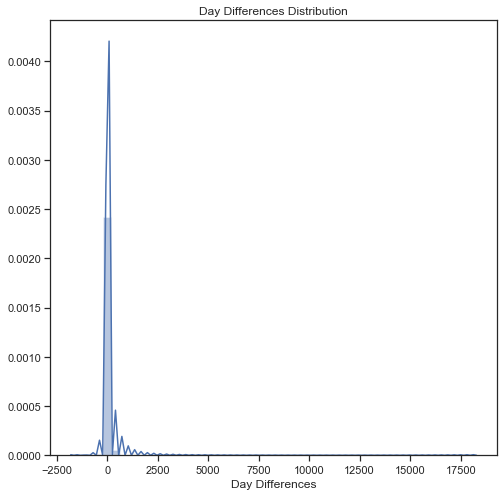

In [20]:
plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution')
sns.distplot(DayDiff['Day Differences'])

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

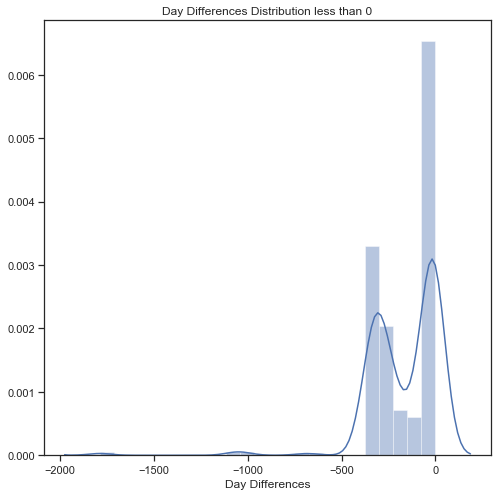

In [21]:
less_than_0 = DayDiff[(DayDiff['Day Differences'] < 0)]

plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution less than 0')
sns.distplot(less_than_0['Day Differences'])

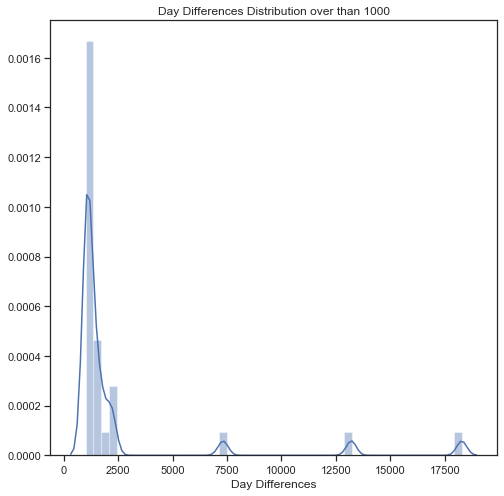

In [22]:
overthan_1000 = DayDiff[(DayDiff['Day Differences'] > 1000)]

plt.figure(figsize=(8,8))
plt.title('Day Differences Distribution over than 1000')
sns.distplot(overthan_1000['Day Differences'])

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [23]:
less_than_0 = DayDiff[(DayDiff['Day Differences'] < 0)]
less_than_0

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44380,2013011700003,2013-01-17,2013-01-17 07:00:00,ABQ,Albuquerque International Sunport Airport,NaN,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
44471,2013021501524,2013-01-29,2013-01-29 23:45:00,LAS,McCarran International,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-1.0
44723,2013031202533,2013-03-05,2013-03-05 09:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,NaN,NaN,NaN,NaN,-1.0
45519,2013071805244,2013-06-26,2013-06-26 07:49:00,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,NaN,NaN,NaN,NaN,NaN,-1.0


In [24]:
overthan_1000 = DayDiff[(DayDiff['Day Differences'] > 1000)]
overthan_1000

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
5727,1217135M,2003-12-17,2000-01-01 00:00:00,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,$190.00,Settled,$90.00,Settle,1446.0
6885,0212302M,2004-02-12,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0
7257,0305106M,2004-03-05,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0
9994,2004082661422,2004-07-19,2001-05-10 00:00:00,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$3;767.85,Closed as a contractor claim,$0.00,NaN,1166.0
10932,2004100464331,2004-09-09,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0
16208,2005061086208,2005-06-01,2002-04-30 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0
18767,2005112396390,2005-11-10,2000-11-03 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,Insufficient; one of the following items requi...,NaN,NaN,1833.0
20800,2006041004307,2006-03-30,2003-03-04 00:00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$199.99,Closed as a contractor claim,$0.00,NaN,1122.0
20981,2006042505316,2006-04-13,2003-07-16 00:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0
21876,2006062608536,2006-06-23,2003-06-07 00:00:00,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0


### ANSWER: 
#### I think both because there is wrong input on Incident/Received Date since we there is some data error on Incident Date and we have to clean it before, same thing for over than 1000 days there is some data point that doesn't make sense (ID = 24271 & 24272) year are over than the year it should be.

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [25]:
claim_copy["Claim Amount"] = claim_copy["Claim Amount"].str.replace("$","")
claim_copy["Close Amount"] = claim_copy["Close Amount"].str.replace("$","")
claim_copy["Claim Amount"] = claim_copy["Claim Amount"].str.replace(";","")
claim_copy["Close Amount"] = claim_copy["Close Amount"].str.replace(";","")

Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [26]:
claim_copy['Claim Amount'] = claim_copy['Claim Amount'].str[:-1].astype('float64')
claim_copy['Close Amount'] = claim_copy['Close Amount'].str[:-1].astype('float64')

In [27]:
claim_copy['Amount Differences'] = claim_copy['Claim Amount'] - claim_copy['Close Amount']

In [28]:
claim_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 15 columns):
Claim Number          51066 non-null object
Date Received         50996 non-null datetime64[ns]
Incident Date         50496 non-null datetime64[ns]
Airport Code          48915 non-null object
Airport Name          48915 non-null object
Airline Name          41470 non-null object
Claim Type            49035 non-null object
Claim Site            50817 non-null object
Item                  48918 non-null object
Claim Amount          46886 non-null float64
Status                47877 non-null object
Close Amount          33786 non-null float64
Disposition           32846 non-null object
Day Differences       50460 non-null float64
Amount Differences    33470 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 5.8+ MB


In [29]:
claim_copy.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [33]:
AmtDiff = claim_copy[np.isfinite(claim_copy['Amount Differences'])]

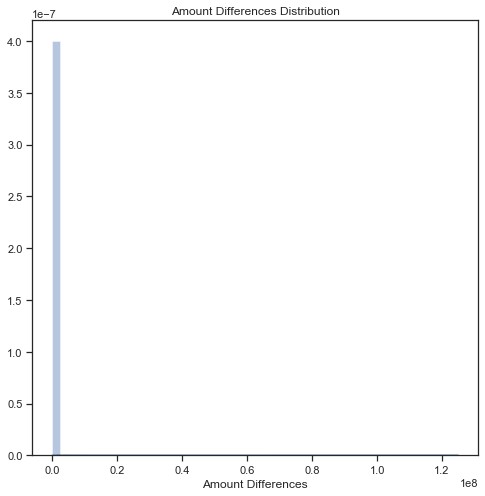

In [34]:
plt.figure(figsize=(8,8))
plt.title('Amount Differences Distribution')
sns.distplot(AmtDiff['Amount Differences'])

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [35]:
claim_copy['Amount Differences'].describe()

count    3.347000e+04
mean     5.217843e+03
std      6.843299e+05
min     -4.311000e+02
25%      0.000000e+00
50%      9.629000e+01
75%      3.400000e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [36]:
Q1 = claim_copy['Amount Differences'].quantile(0.25)
Q3 = claim_copy['Amount Differences'].quantile(0.75)
IQR = Q3 - Q1
data_clean = claim_copy[((claim_copy['Amount Differences']<Q1-(1.5*IQR)) |
                         (claim_copy['Amount Differences']>Q3+(1.5*IQR)))]
data_clean

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,2300.00


In [37]:
data_clean['Claim Amount'].describe()

count    4.103000e+03
mean     4.164579e+04
std      1.954354e+06
min      8.510100e+02
25%      1.214375e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [38]:
data_clean['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

In [ ]:
count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [39]:
print("Maximum amount claimed : ", data_clean['Close Amount'].max())
print("Average amount claimed : ", data_clean['Close Amount'].mean())

Maximum amount claimed :  20000.0
Average amount claimed :  114.61364611260055


In [40]:
print("Maximum amount claimed : ", data_clean['Claim Amount'].max())
print("Average amount claimed : ", data_clean['Claim Amount'].mean())

Maximum amount claimed :  125000000.0
Average amount claimed :  41645.79050450906


### ANSWER
#### Setuju, karena seperti yang dapat dilihat pada data diatas jumlah maksimal dan rata-rata close amount (nilai taksir barang) tidak sama dengan jumlah maksimal dan rata-rata claim amount yang diinginkan oleh pihak yang melakukan claim.

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## ANSWER QUESTION 1

In [41]:
a = data_clean[data_clean['Airport Name'].notnull()]

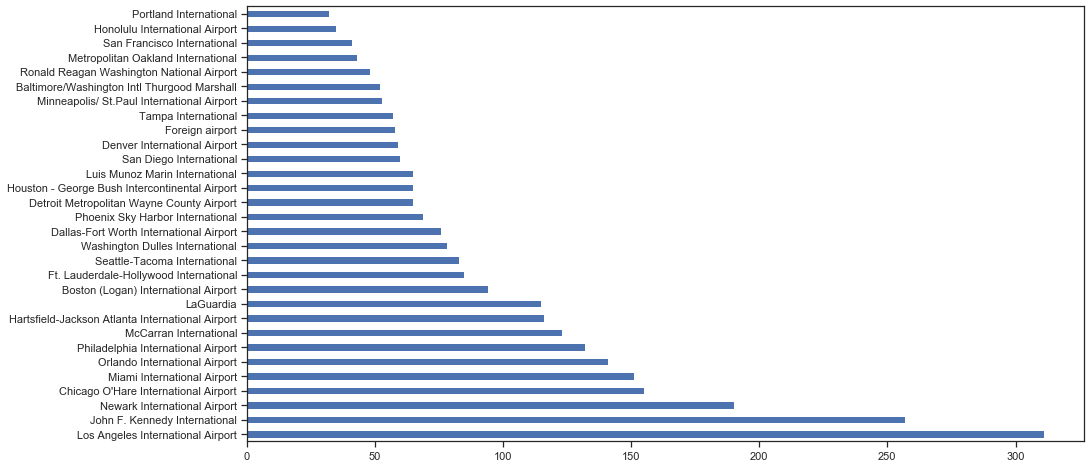

In [42]:
plt.figure(figsize=(15,8))
airport_name = a['Airport Name'].value_counts()
temp2 = airport_name.head(30)
temp2.plot(kind='barh')

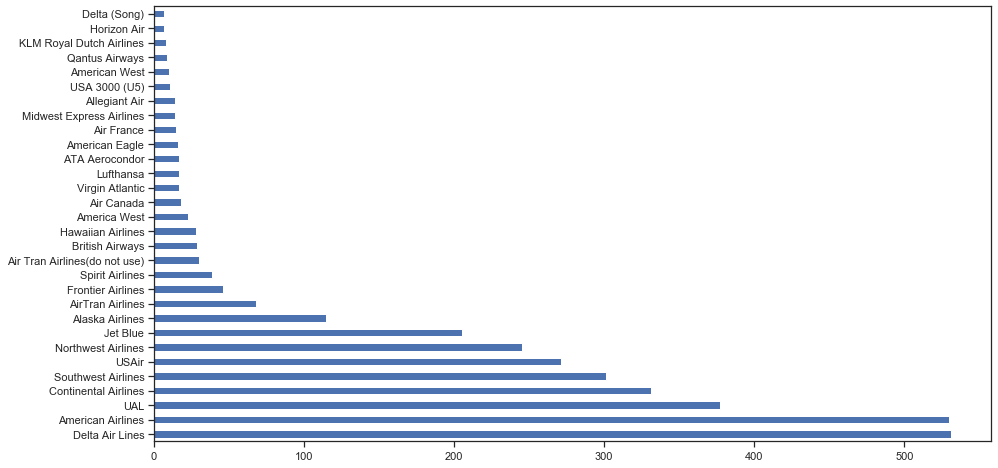

In [43]:
plt.figure(figsize=(15,8))
airport_name = a['Airline Name'].value_counts()
temp2 = airport_name.head(30)
temp2.plot(kind='barh')

## ANSWER QUESTION 1.1
#### Ada hubungan antara Airpot Names dan Airlines Names dengan jumlah claim, karena seperti dapat dilihat pada 2 grafik diatas bahwa jumlah claim tidak merata antara Airport/Airline lainnya, dan ada beberapa Airport/Airline yang menjadi sumber claim tertinggi dibanding dengan Airport/Airline lain.

In [44]:
data_clean[data_clean['Claim Type'].notnull()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,1832.22
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.0,Settle,33.0,1400.00
149,23124,2002-12-11,2002-11-03 00:00:00,CHS,Charleston International,USAir,Passenger Property Loss,Other,Jewelry - Fine,11500.00,Canceled,0.0,NaN,38.0,11500.00
150,2004070158217,2002-12-11,2002-09-25 00:00:00,PHX,Phoenix Sky Harbor International,America West,Passenger Theft,Checkpoint,Jewelry - Fine,5800.00,Denied,0.0,Deny,77.0,5800.00
163,0715526M,2002-12-13,2002-08-14 00:00:00,BOS,Boston (Logan) International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,1800.00,Denied,0.0,Deny,121.0,1800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.0,Deny,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.0,Deny,26.0,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.0,Deny,7.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.0,Deny,15.0,2300.00


In [45]:
data_clean[data_clean['Claim Type'].isna()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,2000.00
23,18356,2002-10-23,2002-09-18,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,1510.32
27,21817,2002-10-29,2002-10-05,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,7500.00
55,19809,2002-11-13,2002-10-21,SMF,Sacramento International Airport,Southwest Airlines,NaN,Other,Computer - Laptop,3500.00,Denied,0.00,Deny,23.0,3500.00
60,21173,2002-11-14,2002-10-19,LAS,McCarran International,Southwest Airlines,NaN,Other,Other,1600.00,Denied,0.00,Deny,26.0,1600.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20861,2006041204324,2006-04-04,2006-03-03,ORD,Chicago O'Hare International Airport,NaN,NaN,Checkpoint,Other,4000.00,Denied,0.00,Deny,32.0,4000.00
23106,2006100213530,2006-09-28,2006-07-22,MIA,Miami International Airport,Aero Mexico,NaN,Checkpoint,Computer - Laptop,1390.36,Denied,0.00,Deny,68.0,1390.36
23146,2006101213933,2006-10-02,2006-09-25,GSO,Piedmont Triad International Airport,USAir,NaN,Checked Baggage,Eyeglasses - (including contact lenses); Jewel...,6197.00,Denied,0.00,Deny,7.0,6197.00
27976,2007101233321,2007-10-09,2007-09-29,ENA,Kenai Municipal Airport,NaN,NaN,NaN,NaN,2663.00,Denied,0.00,Deny,10.0,2663.00


In [46]:
data_clean[data_clean['Claim Type'].notnull()]['Claim Site'].value_counts()

Checked Baggage    3027
Checkpoint          886
Other                28
Motor Vehicle        12
Name: Claim Site, dtype: int64

In [47]:
data_clean[data_clean['Claim Type'].isna()]['Claim Site'].value_counts()

Checked Baggage    99
Checkpoint         27
Other              14
Name: Claim Site, dtype: int64

## ANSWER QUESTION 1.2
### I can't find the pattern why there is a NaN in Claim Type column, as you can see above I try to see the pattern with showing 2 table with NaN and Not NaN Value. so my conclusion is the disclaimer forget or confused to fill the Claim Type or the Admin forget to fill the columns.

## ANSWER QUESTION 2

2. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [48]:
unique_claim_type = data_clean['Claim Type'].value_counts()
unique_claim_type

Passenger Property Loss    3063
Property Damage             740
Personal Injury             127
Passenger Theft              13
Motor Vehicle                 8
Employee Loss (MPCECA)        7
Name: Claim Type, dtype: int64

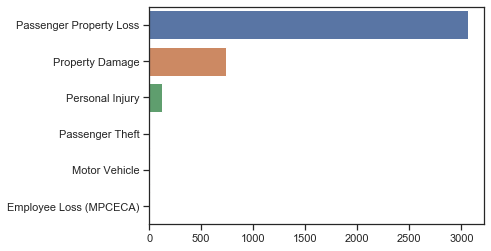

In [49]:
claim_index = unique_claim_type.index
claim_values = unique_claim_type.values

sns.barplot(y=claim_index, x=claim_values, orient='horizontal')

Text(0, 0.5, 'Count')

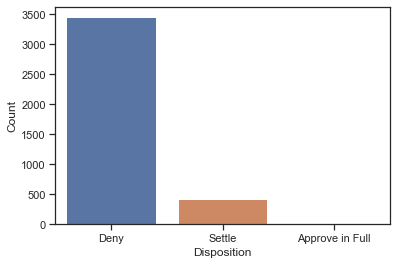

In [50]:
dispos = data_clean['Disposition'].value_counts()
sns.barplot(dispos.index, dispos.values)
plt.xlabel('Disposition')
plt.ylabel('Count')

In [51]:
data_clean[data_clean['Disposition'] == 'Deny']['Claim Type'].value_counts(normalize=True)*100

Passenger Property Loss    79.411765
Property Damage            17.256903
Personal Injury             2.761104
Passenger Theft             0.240096
Employee Loss (MPCECA)      0.180072
Motor Vehicle               0.150060
Name: Claim Type, dtype: float64

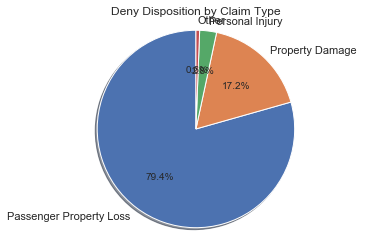

In [52]:
labels = 'Passenger Property Loss', 'Property Damage', 'Personal Injury', 'Other'
sizes = [79.41, 17.25,2.76,0.6]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Deny Disposition by Claim Type')
plt.show()

In [53]:
data_clean[data_clean['Disposition'] == 'Settle']['Claim Type'].value_counts(normalize=True)*100

Passenger Property Loss    57.215190
Property Damage            34.936709
Personal Injury             6.582278
Passenger Theft             1.012658
Employee Loss (MPCECA)      0.253165
Name: Claim Type, dtype: float64

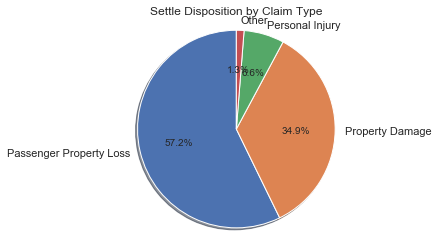

In [54]:
labels = 'Passenger Property Loss', 'Property Damage', 'Personal Injury', 'Other'
sizes = [57.21, 34.93,6.58,1.25]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Settle Disposition by Claim Type')
plt.show()

In [55]:
data_clean[data_clean['Disposition'] == 'Approve in Full']['Claim Type'].value_counts(normalize=True)*100

Passenger Theft            50.0
Passenger Property Loss    50.0
Name: Claim Type, dtype: float64

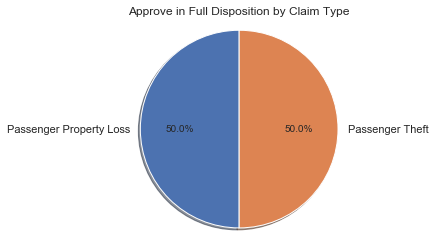

In [56]:
labels = 'Passenger Property Loss', 'Passenger Theft'
sizes = [50.00, 50.00]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Approve in Full Disposition by Claim Type')
plt.show()

In [ ]:
data_clean['Disposition'].value_counts()

### ANSWER QUESTION 2
#### Seperti yang dapat dilihat pada diagram lingkaran diatas bahwa sebagian besar dispotion yang di tolak permohonan klaimnya adalah Passenger Property Lost sebesar 79% dari 3450 Deny Disposition yang ditolak, sedangkan dari keseluruhan klaim hanya 2 klaim saja yang di-approve permohonan klaimnya. Lalu, ada 413 Disposition yang settle dengan 57.2% tipe klaim Passenger Property Lost. Dengan sebagian besar claim type adalah passenger property lost perlu dicermati kembali keamanan dari setiap bandara serta setiap airlines

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
data_clean['Incident Month'] = data_clean['Incident Date'].apply(lambda x: x.month)
data_clean['Incident Year'] = data_clean['Incident Date'].apply(lambda x: x.year)

In [59]:
seasons = []
for x in data_clean['Incident Month']:
    if (x >= 3) & (x <= 5):
        seasons.append('Spring')
    elif (x >= 6) & (x <= 8):
        seasons.append('Summer')
    elif (x >= 9) & (x <= 11):
        seasons.append('Fall')
    else:
        seasons.append('Winter')
data_clean['seasons'] = seasons

Text(0.5, 1.0, 'Number of Incident in Years')

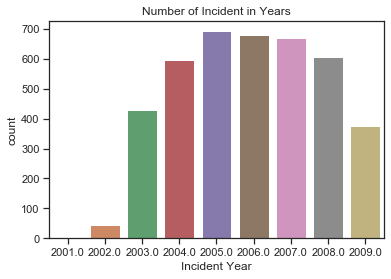

In [60]:
sns.countplot(x = 'Incident Year', data=data_clean)
plt.title('Number of Incident in Years')

#### Dari grafik diatas dapat dilihat bahwa kejadian mulai meningkat semenjak tahun 2003 hingga puncaknya pada tahun 2005 dan mulai turun secara perlahan hingga tahun 2008, lalu turun secara signifikan pada tahun 2009.

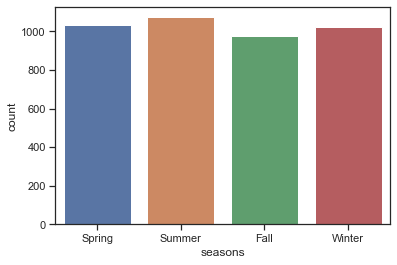

In [61]:
sns.countplot(x = 'seasons', data=data_clean, order = ['Spring','Summer','Fall','Winter'])

#### Sedangkan jika dilihat kejadian berdasarkan musimnya tidak ada perbedaan signifikan antara musin yang satu dengan yang lain, namun kejadian tertinggi memang terjadi pada saat Summer (musim liburan)

In [62]:
onefive = data_clean[data_clean['Incident Year'] == 2005.0]
onesix = data_clean[data_clean['Incident Year'] == 2006.0]
oneseven = data_clean[data_clean['Incident Year'] == 2007.0]

Text(0.5, 1.0, '2007')

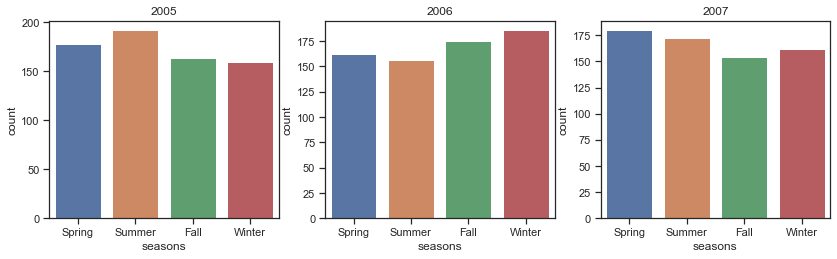

In [63]:
plt.figure(figsize =(14,8))
plt.subplot(2,3,1)
sns.countplot(x = 'seasons', data=onefive, order = ['Spring','Summer','Fall','Winter'])
plt.title('2005')
plt.subplot(2,3,2)
sns.countplot(x = 'seasons', data=onesix, order = ['Spring','Summer','Fall','Winter'])
plt.title('2006')
plt.subplot(2,3,3)
sns.countplot(x = 'seasons', data=oneseven, order = ['Spring','Summer','Fall','Winter'])
plt.title('2007')

#### Jika diplot berdasarkan musim pada 3 tahun dengan kejadian tertinggi, hal menarik dapat ditemukan pada tahun 2006 dimana kejadian tertinggi terjadi pada saat musim dingin, berbeda dengan musim-musim pada tahun lainnya.

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [ ]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard